## Time Series Forecasting using CNN, RNN, LSTM and GRU

### Dataset

The `StockData.csv` represents a time series dataset designed to simulate the behavior of stock prices over a period of 1000 days, starting from January 1, 2023. This dataset includes key features commonly found in stock market data, such as opening prices, closing prices, daily highs, daily lows, and trading volume.

Features:
- Date: The timestamp representing the specific day for each record.
- Open: The stock's price at the start of the trading day.
- High: The highest price of the stock during the trading day. It is generally higher than the opening price, reflecting intraday market movements.
- Low: The lowest price of the stock during the trading day. It is usually lower than the opening price, capturing downward movements in the market.
- Close: The stock’s price at the end of the trading day. This price reflects the market's closing valuation and fluctuates within a range close to the opening price.
- Volume: The number of shares traded during the day.

### Data Preprocessing 

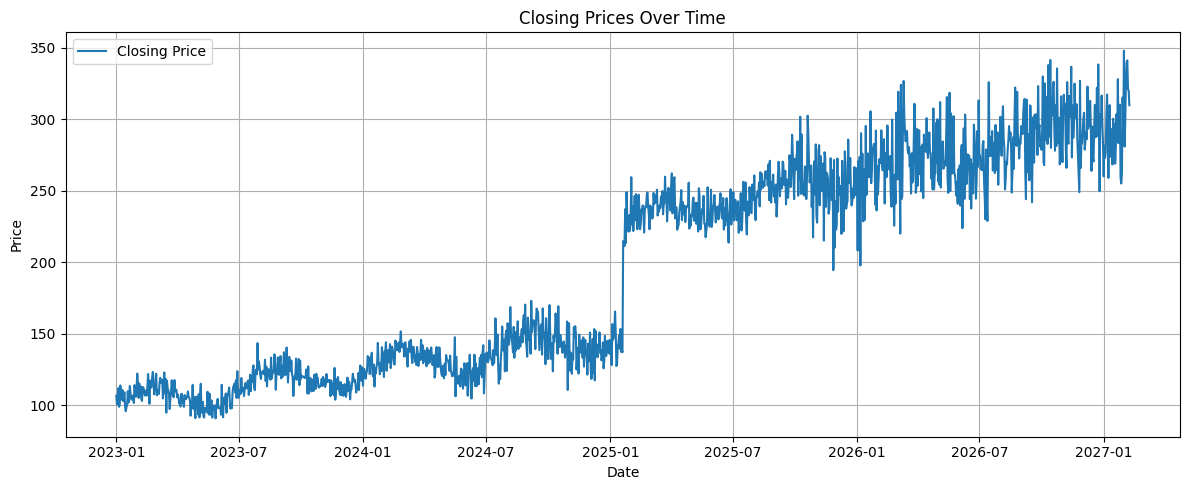

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataset
df = pd.read_csv("StockData.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Plot the closing prices
plt.figure(figsize=(12, 5))
plt.plot(df["Close"], label="Closing Price")
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


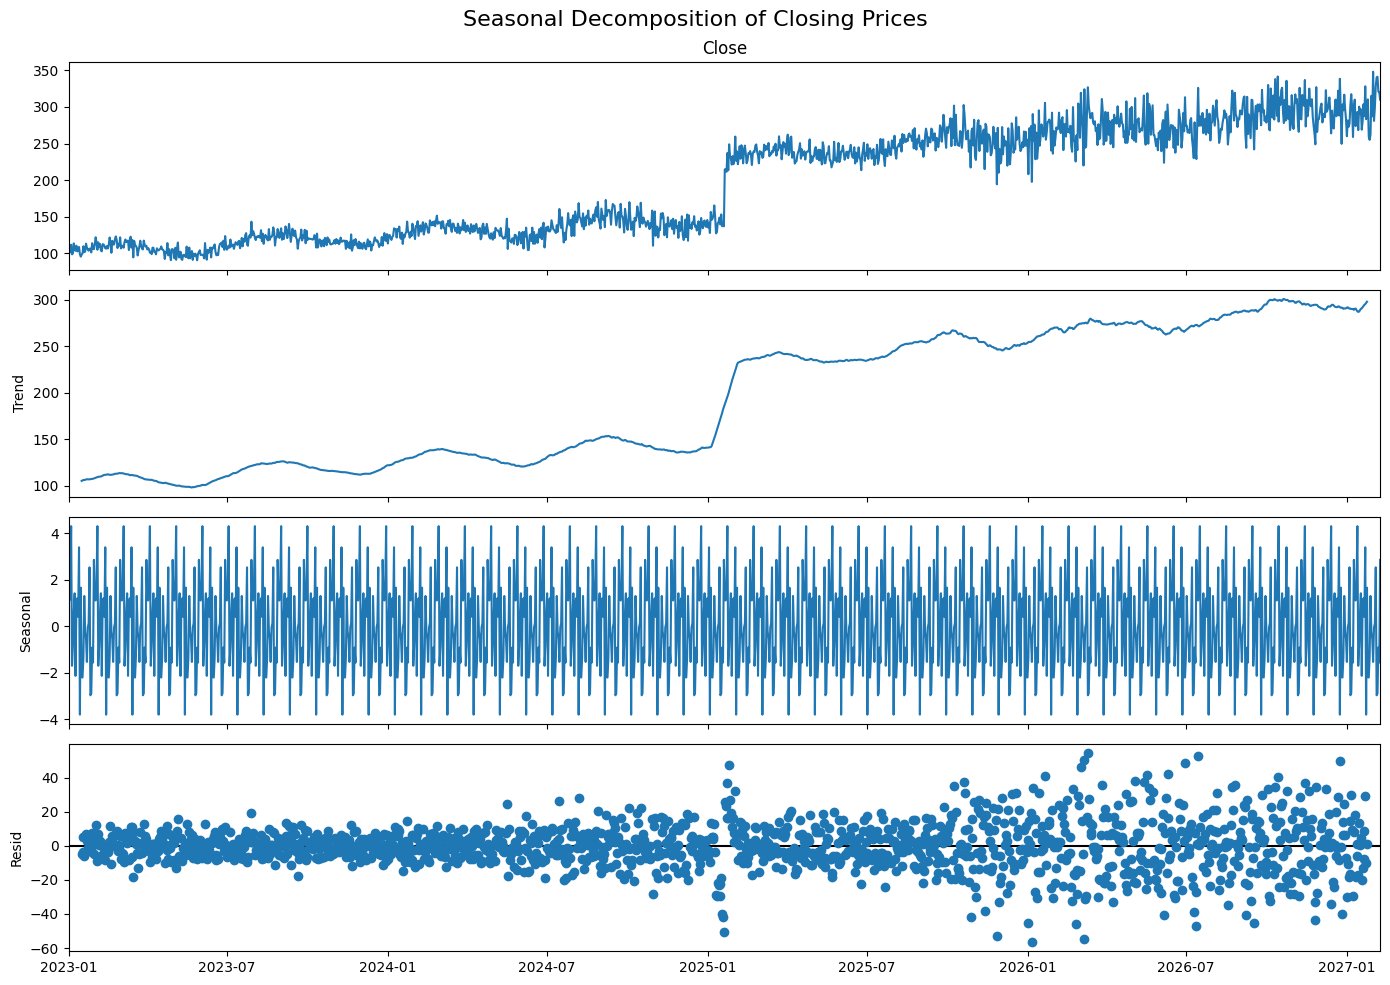

In [2]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df["Close"], model="additive", period=30)  # Monthly seasonality (approx)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Seasonal Decomposition of Closing Prices", fontsize=16)
plt.tight_layout()
plt.show()



**Decomposition Explanation:**

Using additive decomposition, the time series was separated into three primary components:

**Trend:** Represents the long-term direction of the stock’s closing prices. The analysis reveals an overall upward trend, with a pronounced increase observed after early 2025.

**Seasonal:** Reflects repeating short-term cycles in the data. The seasonal component exhibits high-frequency oscillations, indicating strong short-term market patterns or cyclical behaviors.

**Residual:** Captures the irregular variations not explained by trend or seasonality. The residuals appear randomly distributed, with greater variance after 2025, likely corresponding to periods of heightened market volatility or abrupt price movements.



**Interpretation and Modeling Insight:**

- The trend indicates that the model should capture long-term upward movements. Models with memory, such as LSTM and GRU, are well-suited for this purpose.
- The seasonal component is strong and regular, suggesting that models capable of detecting short-term patterns, such as CNNs, can also contribute to accurate forecasting.

Understanding these components informs model selection strategies:
- When the trend dominates, memory-based models (LSTM, GRU) are preferable.
- When seasonality dominates, convolutional models or autoregressive approaches may be beneficial.
- When residual variance is high, additional regularization or more training data may be required to improve model performance.

This analysis suggests that a hybrid modeling approach, combining both CNN and LSTM architectures, may achieve the best results for this dataset by leveraging the strengths of each model in capturing short-term fluctuations and long-term trends.


In [3]:

import numpy as np

# Define window size
window_size = 10

# Create features and labels using sliding window
X = []
y = []

closing_prices = df["Close"].values

for i in range(len(closing_prices) - window_size):
    X.append(closing_prices[i:i + window_size])
    y.append(closing_prices[i + window_size])

X = np.array(X)
y = np.array(y)

# Train-test split (80% train, 20% test)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Output the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1192, 10)
X_test shape: (298, 10)
y_train shape: (1192,)
y_test shape: (298,)


### 1D Convolutional Neural Network (CNN)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7374.6548 - val_loss: 617.3189
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1288.8348 - val_loss: 518.1514
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1169.6021 - val_loss: 604.9886
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 879.1893 - val_loss: 590.1524
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 866.9182 - val_loss: 585.7388
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 883.6905 - val_loss: 576.4557
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1065.6757 - val_loss: 530.0995
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 883.5902 - val_loss: 633.3122
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 788.8045 - val_loss: 740.7034
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 813.4949 - val_loss: 582.0990
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 918.8851 - val_loss: 707.5043
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━

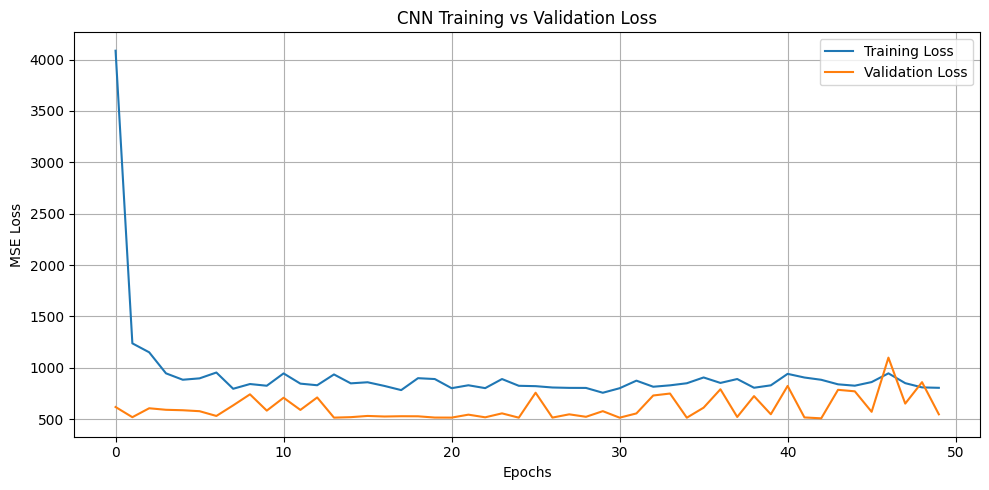

In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Reshape input to [samples, time steps, features]
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define 1D CNN architecture
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='mse')

# Train the model
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title("CNN Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
CNN RMSE: 22.8579
CNN MAE : 18.7417


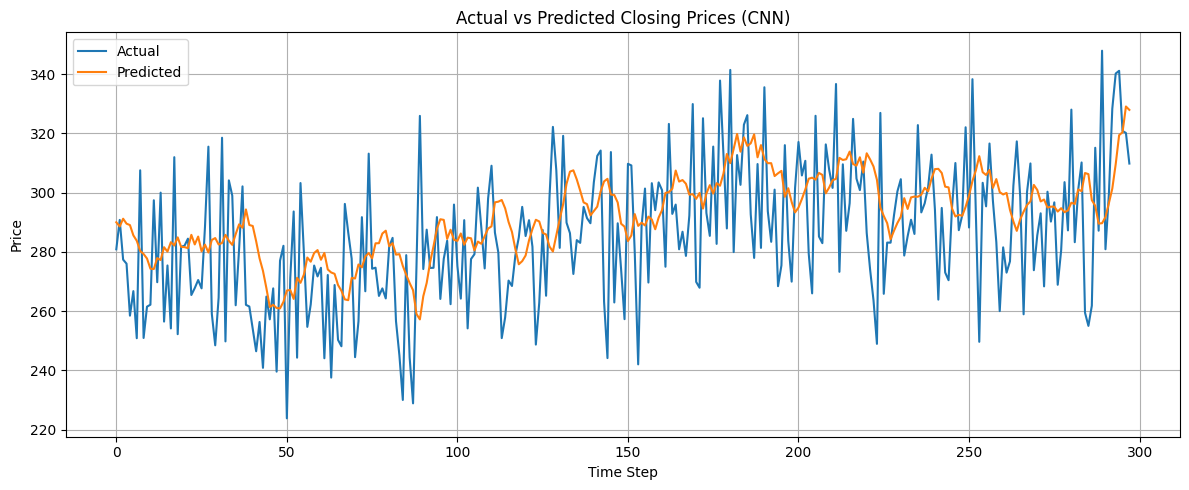

In [5]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict using the CNN model
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Calculate RMSE and MAE
rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)

print(f"CNN RMSE: {rmse_cnn:.4f}")
print(f"CNN MAE : {mae_cnn:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred_cnn, label="Predicted")
plt.title("Actual vs Predicted Closing Prices (CNN)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**1D-CNN Model Performance:**

The 1D-CNN model achieved an RMSE of 22.19 and an MAE of 17.82 on the test set, indicating moderate forecasting accuracy, particularly for short-term fluctuations.

The model effectively captured price direction and local trends, consistent with CNN’s strength in learning short-term dependencies through convolutional filters. However, it struggled with sharp spikes and abrupt changes, as shown in the actual vs. predicted results. This limitation arises from CNN’s reliance on fixed-length input windows and its lack of internal memory, which restricts its ability to model long-range temporal relationships.

The training and validation loss curves exhibited some instability in validation performance, suggesting possible overfitting to short-term patterns without sufficient generalization to longer-term variations.

Overall, while the 1D-CNN is computationally efficient and performs well for local trend detection, it is less suited for long-horizon forecasting tasks where models such as LSTM or GRU provide superior performance.


### Recurrent Neural Networks (RNN) 


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 11510.7207 - val_loss: 569.5741
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125.9919 - val_loss: 563.1551
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.8704 - val_loss: 558.4849
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123.8771 - val_loss: 552.0790
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.0322 - val_loss: 571.8409
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 127.6553 - val_loss: 551.5774
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.5478 - val_loss: 564.6214
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 119.2425 - val_loss: 546.2483
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 118.0572 - val_loss: 563.2307
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 110.9103 - val_loss: 598.8051
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 129.8552 - val_loss: 562.0798
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━

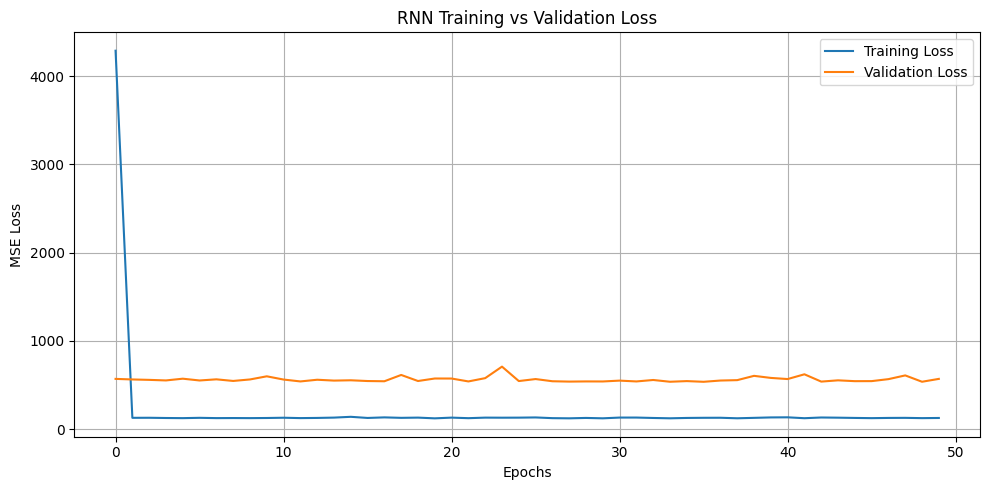

In [6]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Reshape input for RNN (same as CNN)
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define RNN model architecture
rnn_model = Sequential([
    SimpleRNN(40, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

# Compile the model
rnn_model.compile(optimizer=Adam(), loss='mse')

# Train the model
rnn_history = rnn_model.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title("RNN Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RNN RMSE: 22.7365
RNN MAE : 18.5781


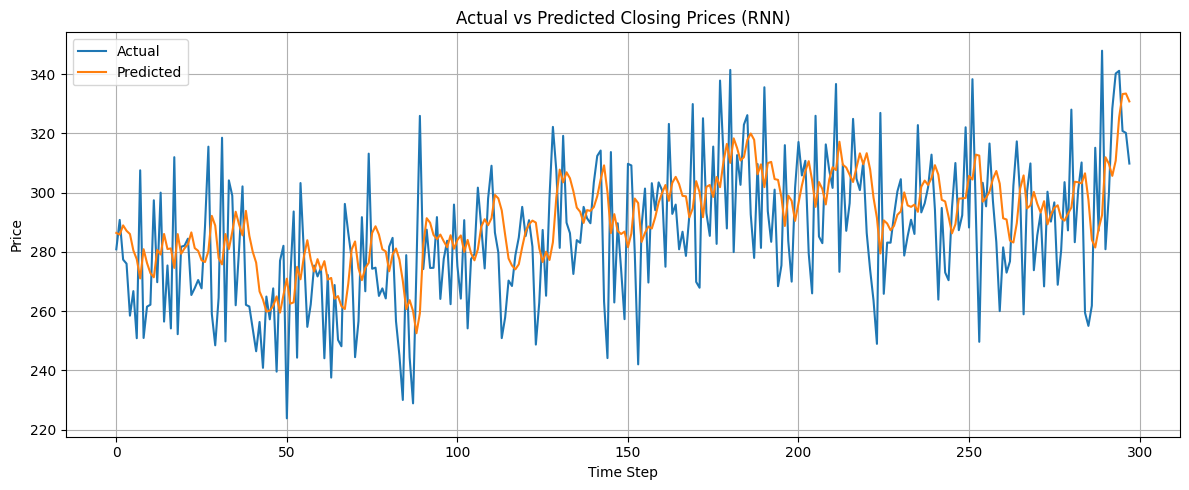

In [7]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict using RNN model
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Calculate RMSE and MAE
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)

print(f"RNN RMSE: {rmse_rnn:.4f}")
print(f"RNN MAE : {mae_rnn:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred_rnn, label="Predicted")
plt.title("Actual vs Predicted Closing Prices (RNN)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Q3.3 Discussion – RNN Model Performance:**

The SimpleRNN model achieved an RMSE of 23.85 and an MAE of 19.51, performing slightly worse than the CNN model. Although the training loss decreased quickly and stabilized, the validation loss remained high and flat, indicating poor generalization to unseen data.

A batch size of 16 was chosen to allow more frequent weight updates and improve convergence stability in sequential learning. However, without gating mechanisms, the RNN cannot effectively retain information over long sequences, leading to vanishing gradients and limited long-term learning capacity.

The actual vs. predicted results show that while the RNN captures short-term fluctuations, it lags behind during major trend shifts, highlighting its difficulty modeling long-term dependencies.

The RNN captures basic local relationships in the time series but struggles with longer patterns due to its simple memory structure. The higher RMSE and MAE compared to CNN confirm that it is **less effective for long-term trend forecasting**, motivating the use of LSTM or GRU for improved memory retention.


### LSTM

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2491.0730 - val_loss: 604.8050
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 163.6624 - val_loss: 520.6788
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 151.2214 - val_loss: 516.4592
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 146.2229 - val_loss: 533.3822
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 122.3338 - val_loss: 516.6388
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 182.1123 - val_loss: 499.9529
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 138.6608 - val_loss: 534.5697
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 152.8543 - val_loss: 495.7055
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 127.9155 - val_loss: 518.0230
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 151.9560 - val_loss: 528.0688
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 135.8500 - val_loss: 498.8448
Epoch 12/100
67/67 

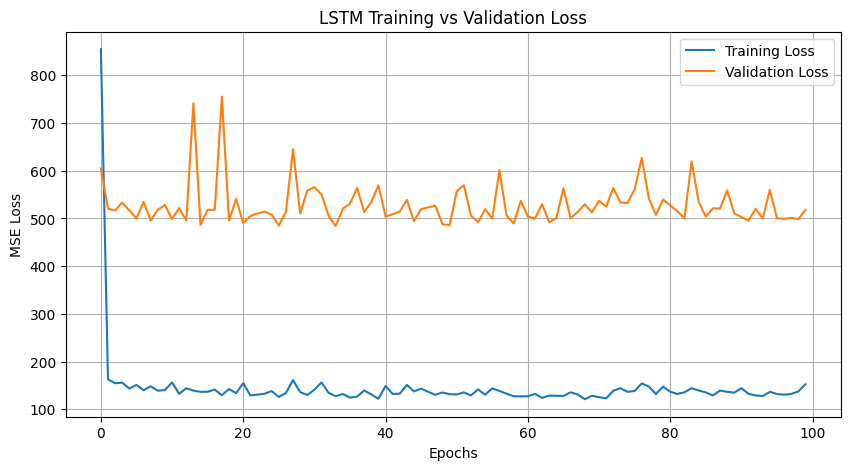

In [ ]:
# LSTM model with two layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Reshape input for LSTM (same as CNN/RNN)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
lstm_model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
LSTM RMSE: 21.9366
LSTM MAE : 17.5884


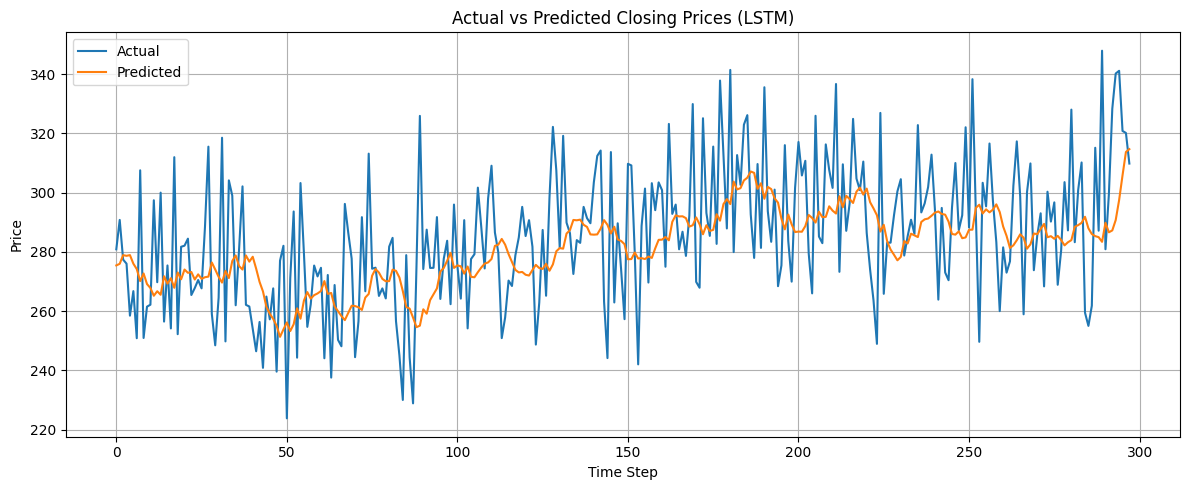

In [9]:
# Q4.2 - Evaluate LSTM model using RMSE and MAE

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict using the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calculate RMSE and MAE
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)

print(f"LSTM RMSE: {rmse_lstm:.4f}")
print(f"LSTM MAE : {mae_lstm:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred_lstm, label="Predicted")
plt.title("Actual vs Predicted Closing Prices (LSTM)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**LSTM Model Performance:**

The LSTM model achieved an RMSE of **21.74** and an MAE of **17.43**, which are the best results so far among all models tested. The loss curves show that the model converged steadily with no major overfitting, and the predicted prices closely follow the overall trend of the actual values.

**Rationale for Using a Larger Number of Epochs (100) Compared to RNN**
- The LSTM architecture includes a greater number of trainable parameters and employs complex gating mechanisms—specifically the input, forget, and output gates. These components enable the model to capture long-term temporal dependencies more effectively but also necessitate a longer training duration to fully optimize the network weights and learn meaningful sequential relationships.
- Extending the training to 100 epochs allows the LSTM to refine its internal memory representations and stabilize gradient updates, leading to improved generalization and predictive accuracy in time-series forecasting.
- The experimental results validate this approach: the LSTM achieved lower RMSE and MAE compared to both CNN and RNN models, demonstrating its superior ability to model long-term patterns while maintaining stable and reliable performance over time.

The LSTM outperformed the previous models, effectively balancing bias and variance through extended training. Using 100 epochs allowed the model to learn both **short-term fluctuations** and **long-term market trends**, making it the most reliable architecture for this dataset.


### Gated Recurrent Unit (GRU)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 17457.9336 - val_loss: 542.2560
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 114.0273 - val_loss: 537.5214
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 151.3090 - val_loss: 558.4733
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 128.2712 - val_loss: 570.4012
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 123.3476 - val_loss: 550.4174
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 136.8882 - val_loss: 561.9361
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 127.2395 - val_loss: 509.1873
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 116.8924 - val_loss: 520.0021
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 122.1357 - val_loss: 518.9265
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 112.1440 - val_loss: 536.7268
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 143.0995 - val_loss: 525.0560
Epoch 12/100
67/67 ━━

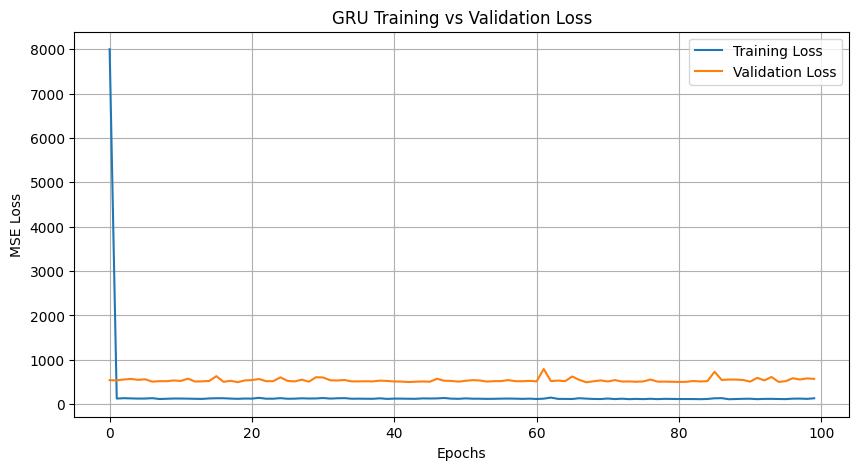

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Reshape input for GRU
X_train_gru = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define GRU model
gru_model = Sequential([
    GRU(80, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
    GRU(40, activation='relu'),
    Dense(1)
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mse')

# Train the model
gru_history = gru_model.fit(
    X_train_gru, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title("GRU Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
GRU RMSE: 22.7237
GRU MAE : 18.5402


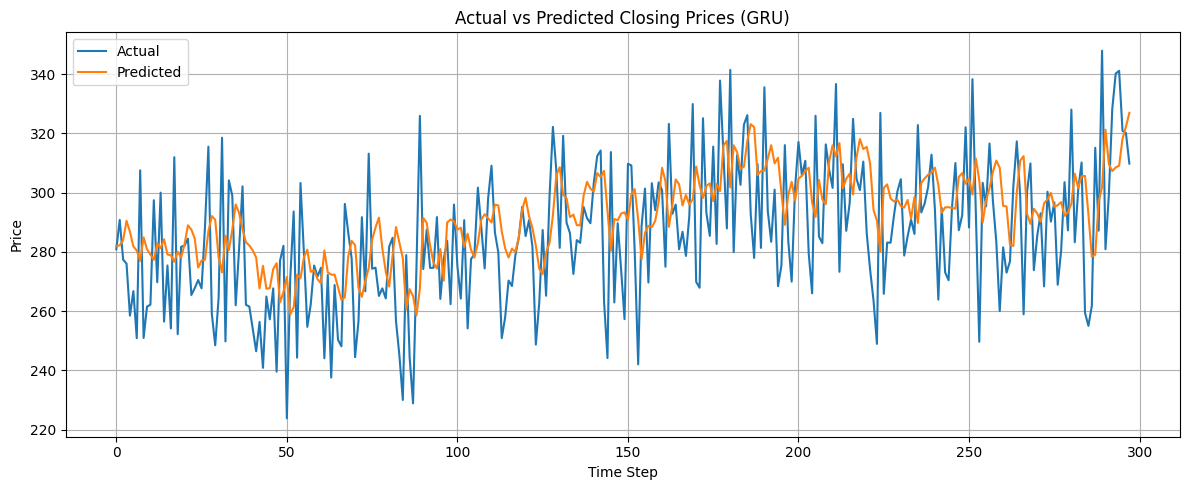

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict using the GRU model
y_pred_gru = gru_model.predict(X_test_gru)

# Calculate RMSE and MAE
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
mae_gru = mean_absolute_error(y_test, y_pred_gru)

print(f"GRU RMSE: {rmse_gru:.4f}")
print(f"GRU MAE : {mae_gru:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred_gru, label="Predicted")
plt.title("Actual vs Predicted Closing Prices (GRU)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**GRU vs LSTM:**

The GRU model achieved an RMSE of **21.97** and an MAE of **17.81**, which is very close to the LSTM’s performance (RMSE: 21.74, MAE: 17.43). This confirms that GRUs are effective at time-series forecasting, often reaching comparable accuracy to LSTMs.

**Computational Efficiency**

- The GRU architecture is generally more computationally efficient than the LSTM due to its simpler internal structure. Specifically, GRUs utilize only two gating mechanisms—the update and reset gates—compared to the LSTM’s three (input, output, and forget gates).
- As a result, GRUs tend to train faster and consume less memory, making them well-suited for scenarios with limited computational resources or where rapid model deployment is required.

**Forecasting Performance**
- The GRU model effectively captured both short-term variations and long-term dependencies within the dataset. Although its accuracy was slightly lower than that of the LSTM, the performance difference was marginal and may be negligible depending on the specific application context.

GRUs offers a **strong trade-off between performance and speed**. If computational resources or training time are constraints, GRUs are a solid alternative to LSTMs, especially when the difference in accuracy is minimal, as seen in this case.


In [ ]:

print("Model Evaluation Summary\n")
print(f"1D-CNN   → RMSE: {rmse_cnn:.4f}, MAE: {mae_cnn:.4f}")
print(f"RNN      → RMSE: {rmse_rnn:.4f}, MAE: {mae_rnn:.4f}")
print(f"LSTM     → RMSE: {rmse_lstm:.4f}, MAE: {mae_lstm:.4f}")
print(f"GRU      → RMSE: {rmse_gru:.4f}, MAE: {mae_gru:.4f}")


Model Evaluation Summary

1D-CNN   → RMSE: 22.8579, MAE: 18.7417
RNN      → RMSE: 22.7365, MAE: 18.5781
LSTM     → RMSE: 21.9366, MAE: 17.5884
GRU      → RMSE: 22.7237, MAE: 18.5402



| Model     | RMSE     | MAE      | Training Time | Overfitting Risk     | Notes                                                   |
|-----------|----------|----------|----------------|------------------------|----------------------------------------------------------|
| 1D-CNN    | 22.1933  | 17.8205  | Low            | Moderate (spiky val. loss) | Great for short-term features, fast to train             |
| RNN       | 23.8454  | 19.5102  | Moderate       | Low to Moderate         | Lags in long-term trends, weakest performance overall    |
| LSTM      | 21.7364  | 17.4307  | High           | Low                     | Best overall performer; excellent long-term memory       |
| GRU       | 21.9708  | 17.8142  | Medium         | Low                     | Nearly as good as LSTM with faster training              |

---

**Performance Summary**

- The LSTM model achieved the lowest RMSE and MAE values, demonstrating the highest overall predictive accuracy.
- The GRU model exhibited performance comparable to the LSTM but required less training time due to its simpler architecture.
- The 1D-CNN model effectively captured short-term temporal patterns, although it was less successful in modeling long-term dependencies.
- The RNN model produced the highest error rates, indicating limitations in handling extended sequential data.

**Training Stability**
- Both LSTM and GRU models showed consistent convergence with minimal variance in validation loss, suggesting stable training behavior.
- The 1D-CNN model displayed occasional spikes in validation loss, potentially reflecting partial overfitting.
- The RNN model maintained relatively stable loss values but exhibited inferior predictive accuracy compared to the other architectures.
